In [127]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [128]:
from google.colab import files
upload=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [129]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name = "data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [131]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     False    False       False      False      False      False   
1     False    False       False      False      False      False   
2     False    False       False      False      False      False   
3     False    False       False      False      False      False   
4     False    False       False      False      False      False   
...     ...      ...         ...        ...        ...        ...   
3994  False    False       False      False      False      False   
3995  False    False       False      False      False      False   
3996  False    False       False      False      False      False   
3997  False    False       False      False      False      False   
3998  False    False       False      False      False      False   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           False        False         

<Axes: >

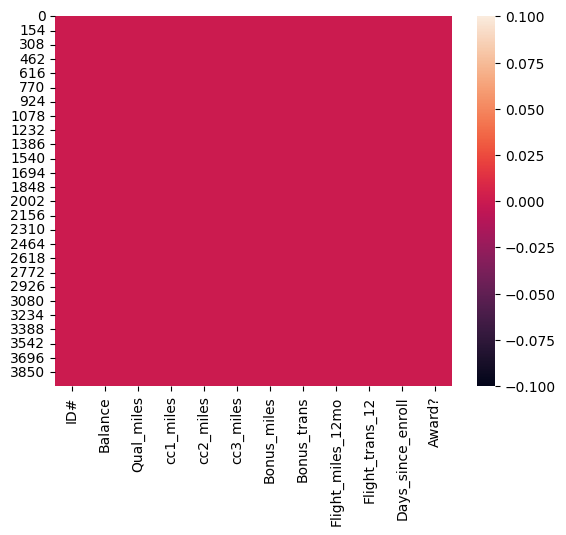

In [132]:
#to genrate heat map for missing values
cols = df.columns
sns.heatmap(df[cols].isnull())

Missing values are zero in each column can be easily seen from this heat map




In [133]:
df[df.duplicated()]
df[df.duplicated()].shape

(0, 12)

There are no duplicate values as well

In [134]:
#get descriptive stats for numerical columns
df.drop(['ID#','Award?'], axis=1).describe().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.0,3999.00,3999.00,3999.00
mean,73601.33,144.11,2.06,1.01,1.01,17144.85,11.6,460.06,1.37,4118.56
std,100775.66,773.66,1.38,0.15,0.20,24150.97,9.6,1400.21,3.79,2065.13
min,0.00,0.00,1.00,1.00,1.00,0.00,0.0,0.00,0.00,2.00
25%,18527.50,0.00,1.00,1.00,1.00,1250.00,3.0,0.00,0.00,2330.00
50%,43097.00,0.00,1.00,1.00,1.00,7171.00,12.0,0.00,0.00,4096.00
75%,92404.00,0.00,3.00,1.00,1.00,23800.50,17.0,311.00,1.00,5790.50
max,1704838.00,11148.00,5.00,3.00,5.00,263685.00,86.0,30817.00,53.00,8296.00


In [135]:
#Correaltion Matrix
df.drop(['ID#','Award?'], axis=1).corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


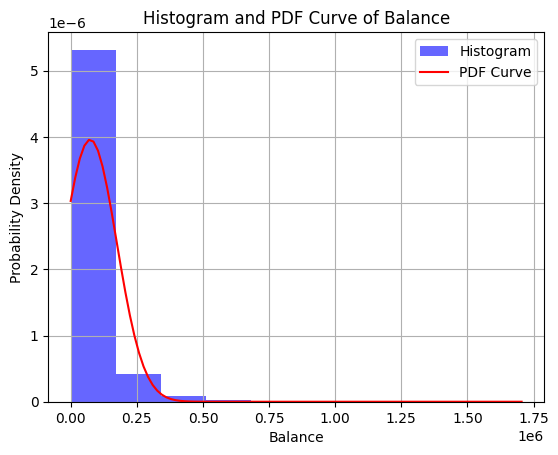

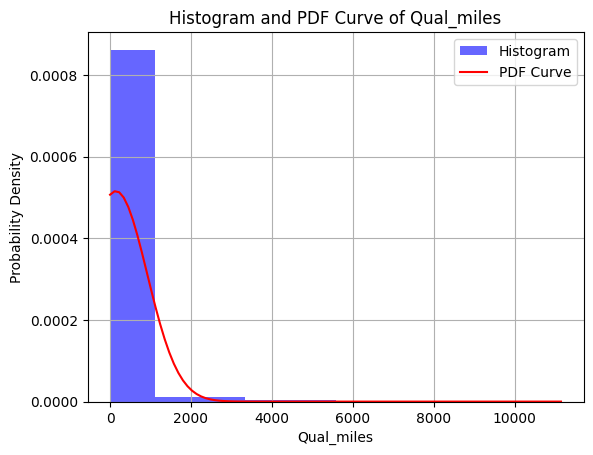

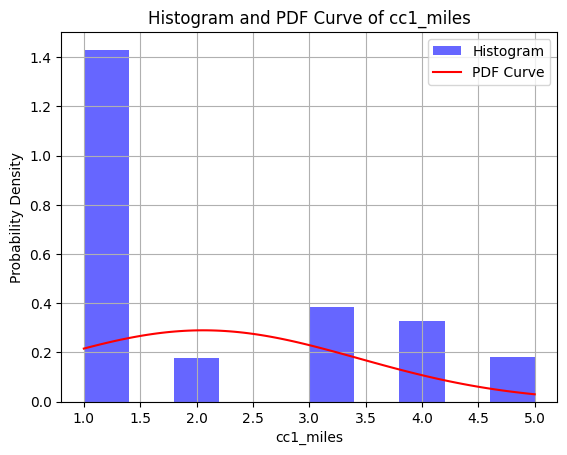

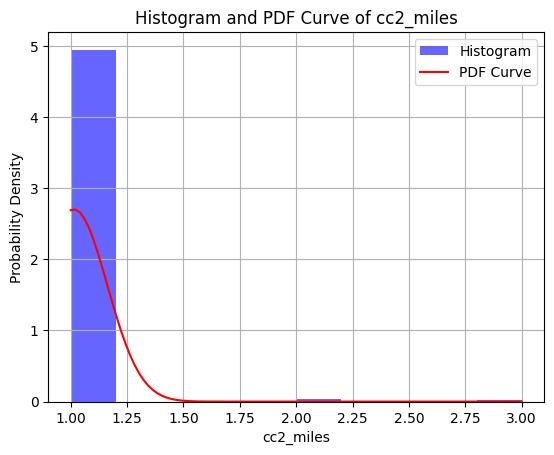

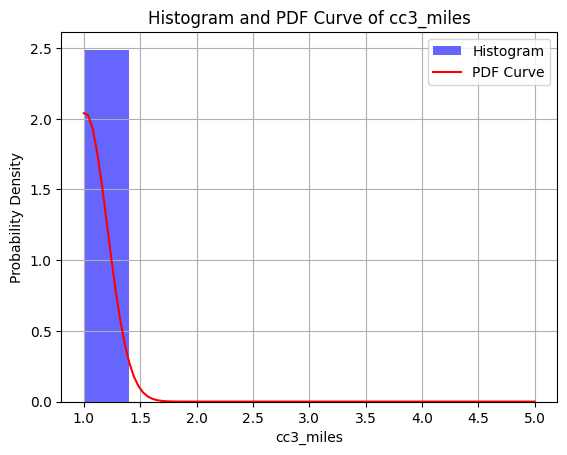

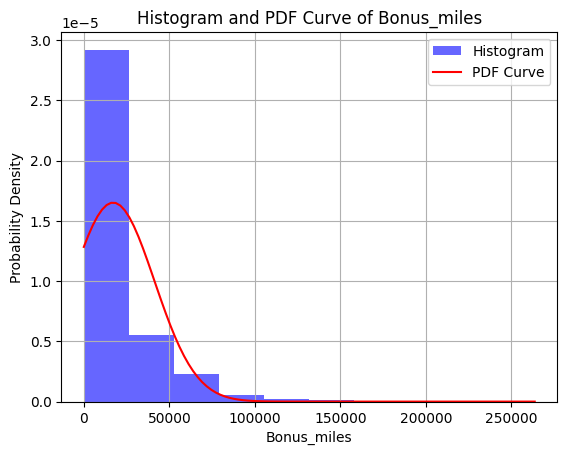

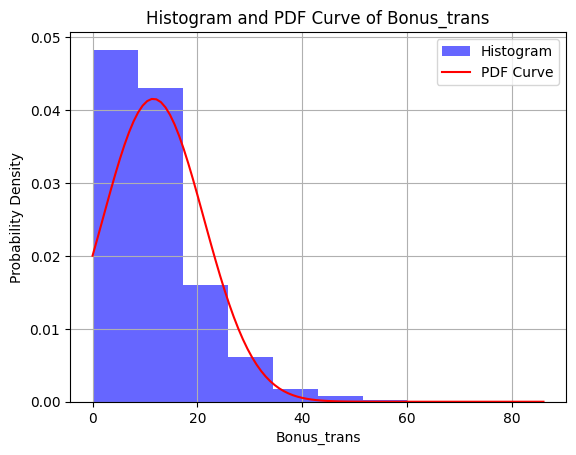

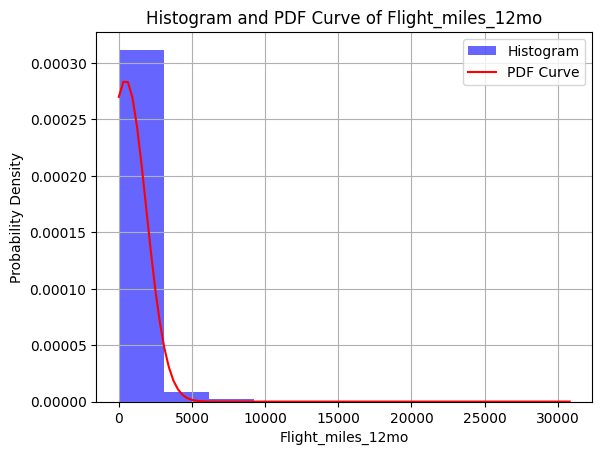

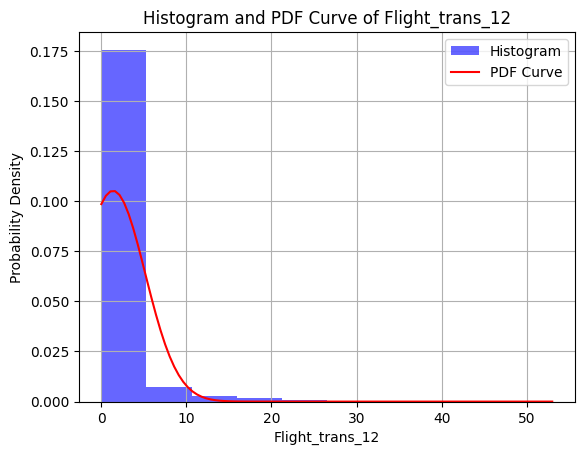

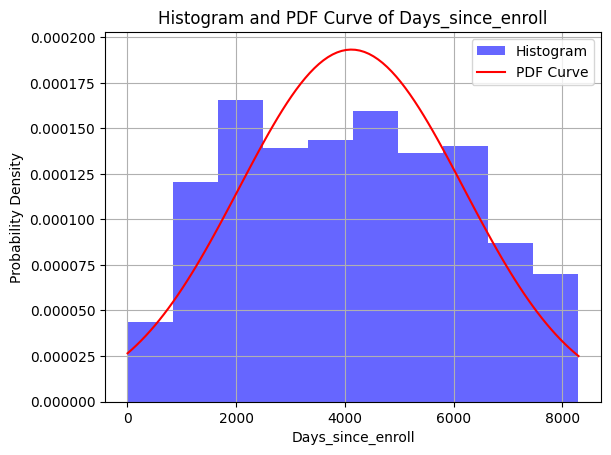

In [136]:
#Histograms
columns_to_plot = ['Balance',	'Qual_miles', 'cc1_miles',	'cc2_miles',	'cc3_miles',	'Bonus_miles',	'Bonus_trans',	'Flight_miles_12mo',	'Flight_trans_12',	'Days_since_enroll']

for col in columns_to_plot:
    df[col].hist(density=True, alpha=0.6, color='b', label='Histogram')

    # Compute the PDF curve
    mu, std = df[col].mean(), df[col].std()
    x = np.linspace(df[col].min(), df[col].max(), 100)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

    # Plot the PDF curve
    plt.plot(x, pdf, 'r', label='PDF Curve')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and PDF Curve of {col}')
    plt.legend()

    # Show the histogram with the curve
    plt.show()


In [137]:
for col in columns_to_plot:
  # Perform the Shapiro-Wilk test
  statistic, p_value = shapiro(df[col])
  alpha = 0.05  # Set your significance level (e.g., 0.05)
  if p_value > alpha:
      print(col+" column is normally distributed (fail to reject H0)")
  else:
      print(col+" column isnt normally distributed (reject H0)")

Balance column isnt normally distributed (reject H0)
Qual_miles column isnt normally distributed (reject H0)
cc1_miles column isnt normally distributed (reject H0)
cc2_miles column isnt normally distributed (reject H0)
cc3_miles column isnt normally distributed (reject H0)
Bonus_miles column isnt normally distributed (reject H0)
Bonus_trans column isnt normally distributed (reject H0)
Flight_miles_12mo column isnt normally distributed (reject H0)
Flight_trans_12 column isnt normally distributed (reject H0)
Days_since_enroll column isnt normally distributed (reject H0)


Clustering can be performed on non-normally distributed data effectively.

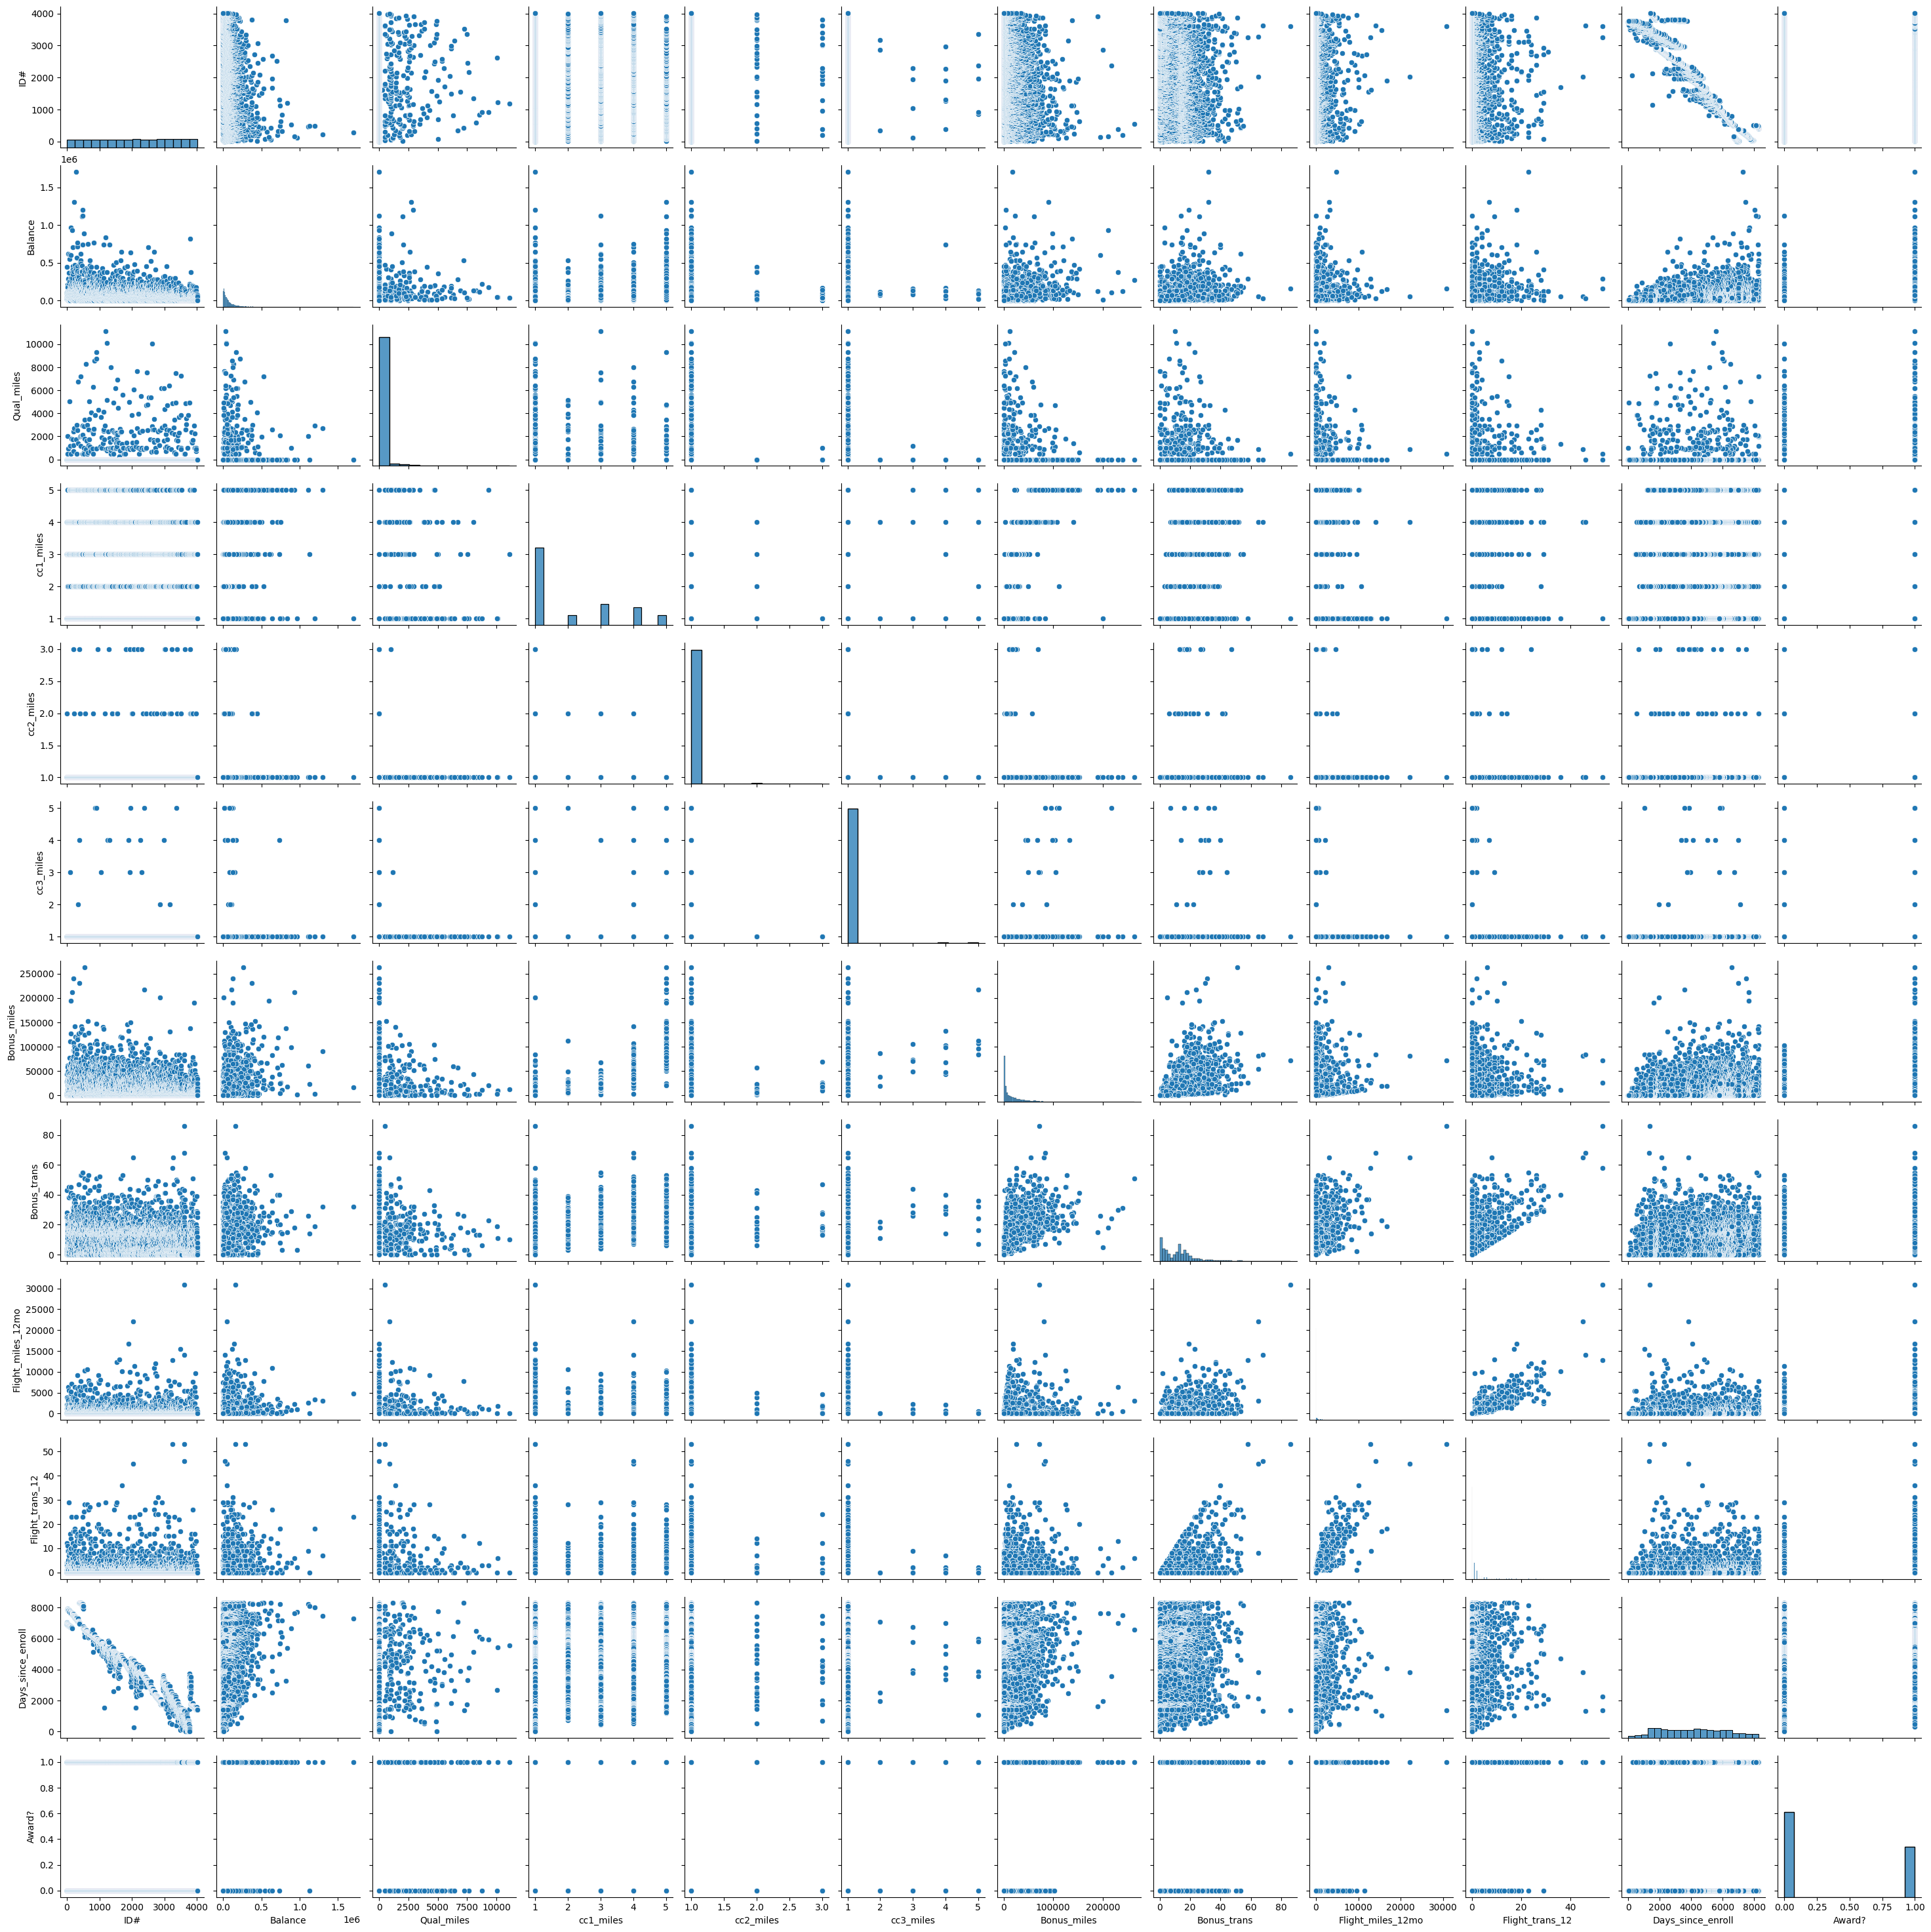

In [138]:
#pair plot
sns.pairplot(df)

In [139]:
df.shape

(3999, 12)

# Standardisation

In [140]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= df.iloc[:,1:13]
SS = StandardScaler()
SS_X= SS.fit_transform(df1)
SS_X.shape

(3999, 11)

In [141]:
MM = MinMaxScaler()
MM_X = MM.fit_transform(df1)
MM_X.shape

(3999, 11)

 To compare the impact of different scaling methods or to prepare the data for various machine learning algorithms that have different scaling requirements.

# Hierarchal clustering

Single

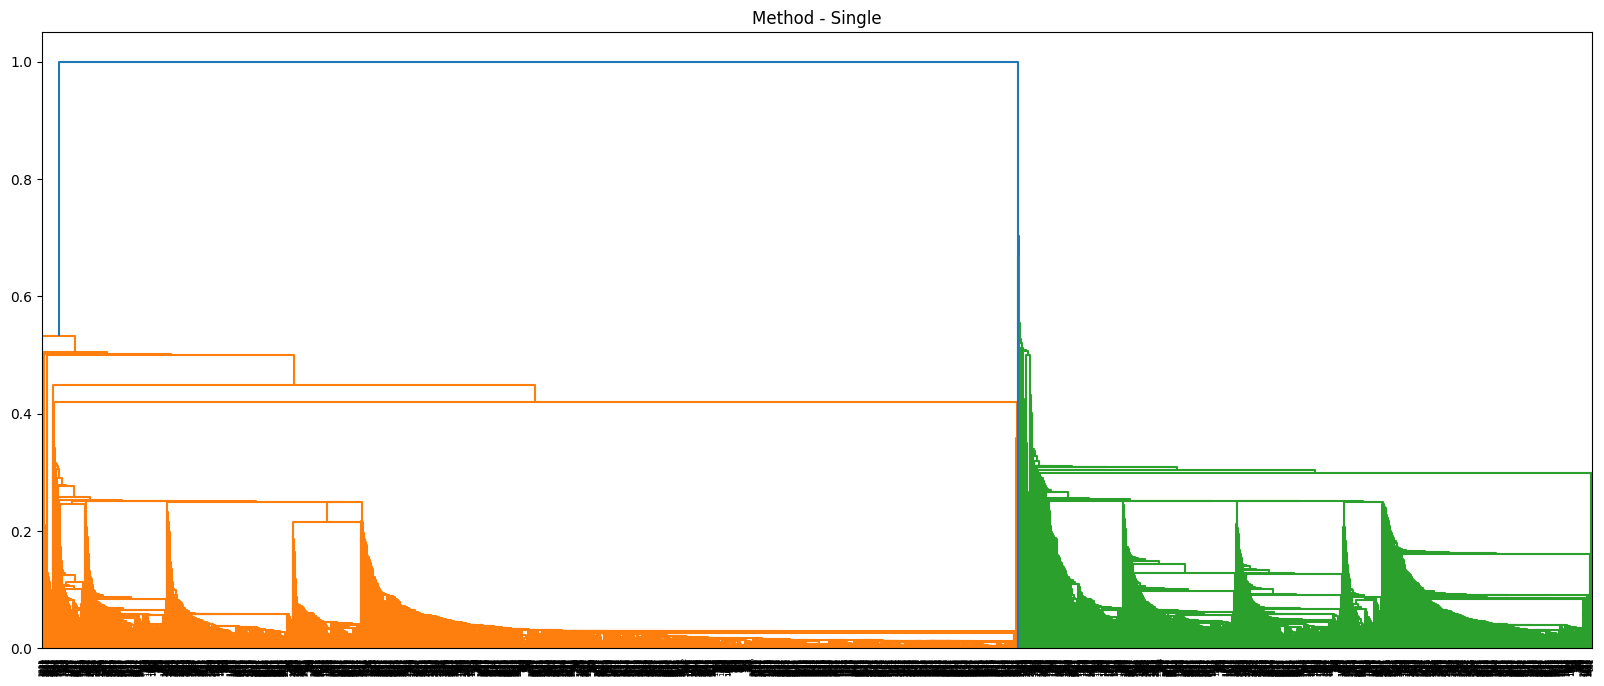

In [142]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='single'))
plt.title("Method - Single")
plt.show()

In [143]:
#creating clusters method - single
HCS = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [144]:
Y_HCS = HCS.fit_predict(MM_X)
Clusters_s = pd.DataFrame(Y_HCS, columns=['Cluster'])
Clusters_s.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
1          2518
0          1480
2             1
dtype: int64

In [145]:
df['h_clusterid'] = Clusters_s
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1744.335811,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,1,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,2,3606.000000,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


Average

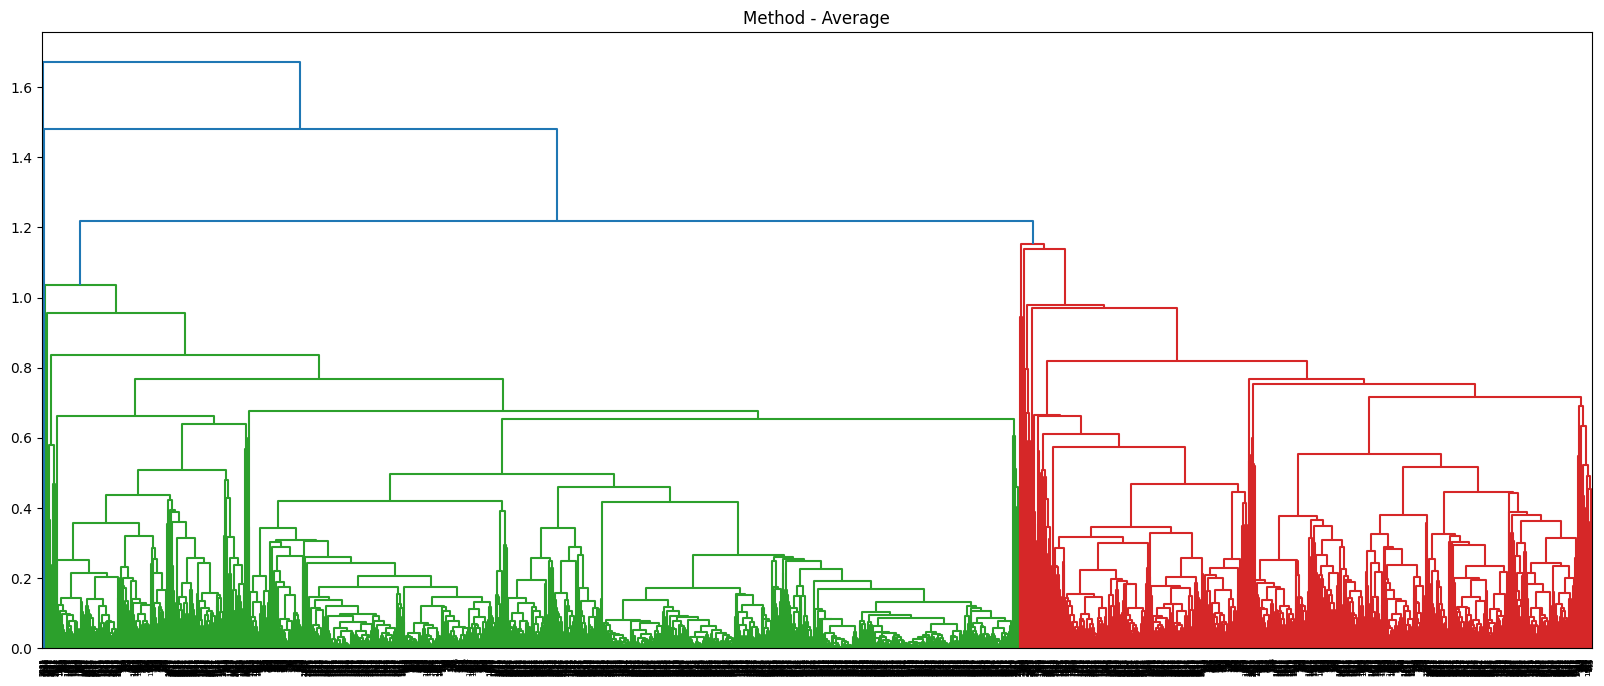

In [146]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='average'))
plt.title("Method - Average")
plt.show()

In [147]:
#creating clusters method - average
HCA = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'average')

In [148]:
Y_HCA = HCA.fit_predict(MM_X)
Clusters_a = pd.DataFrame(Y_HCA, columns=['Cluster'])
Clusters_a.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0          3994
1             4
2             1
dtype: int64

In [149]:
df['h_clusterid'] = Clusters_a
df.groupby('h_clusterid').agg(['mean']).reset_index()
#print(df)

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2014.139209,7.313442e+04,143.947421,2.059339,1.014522,1.012268,17096.29319,11.539059,439.434151,1.32023,4119.688282,0.369554
1,1,3128.000000,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.25000,69.250000,19960.000000,49.25000,2200.250000,1.000000
2,2,279.000000,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.00000,32.000000,4823.000000,23.00000,7283.000000,1.000000


Complete

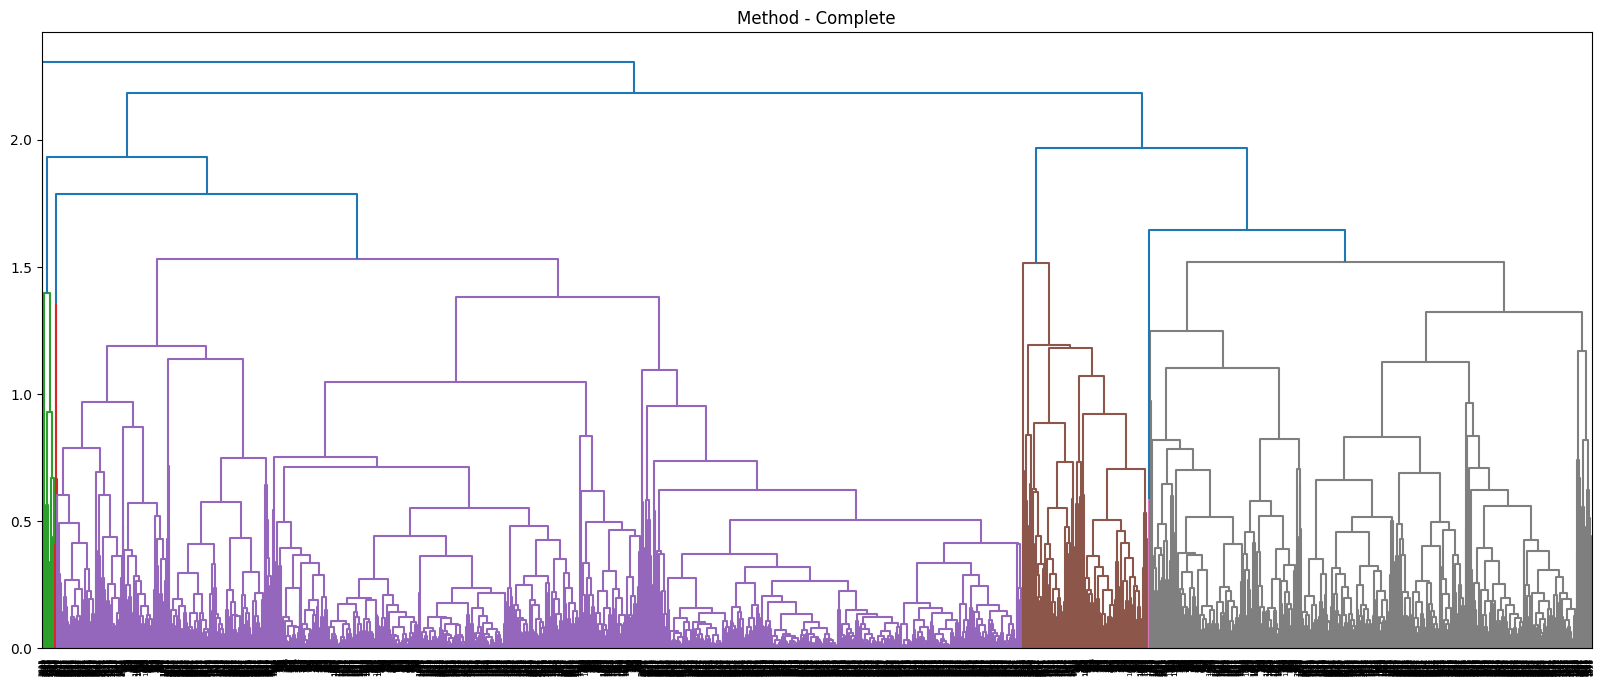

In [150]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='complete'))
plt.title("Method - Complete")
plt.show()

In [151]:
#creating clusters method - average
HCC = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage= 'complete')

In [152]:
Y_HCC = HCC.fit_predict(MM_X)
Clusters_c = pd.DataFrame(Y_HCC, columns=['Cluster'])
Clusters_c.value_counts()
#print(Clusters_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
2          2491
0          1144
1           325
4            31
3             4
5             4
dtype: int64

Ward

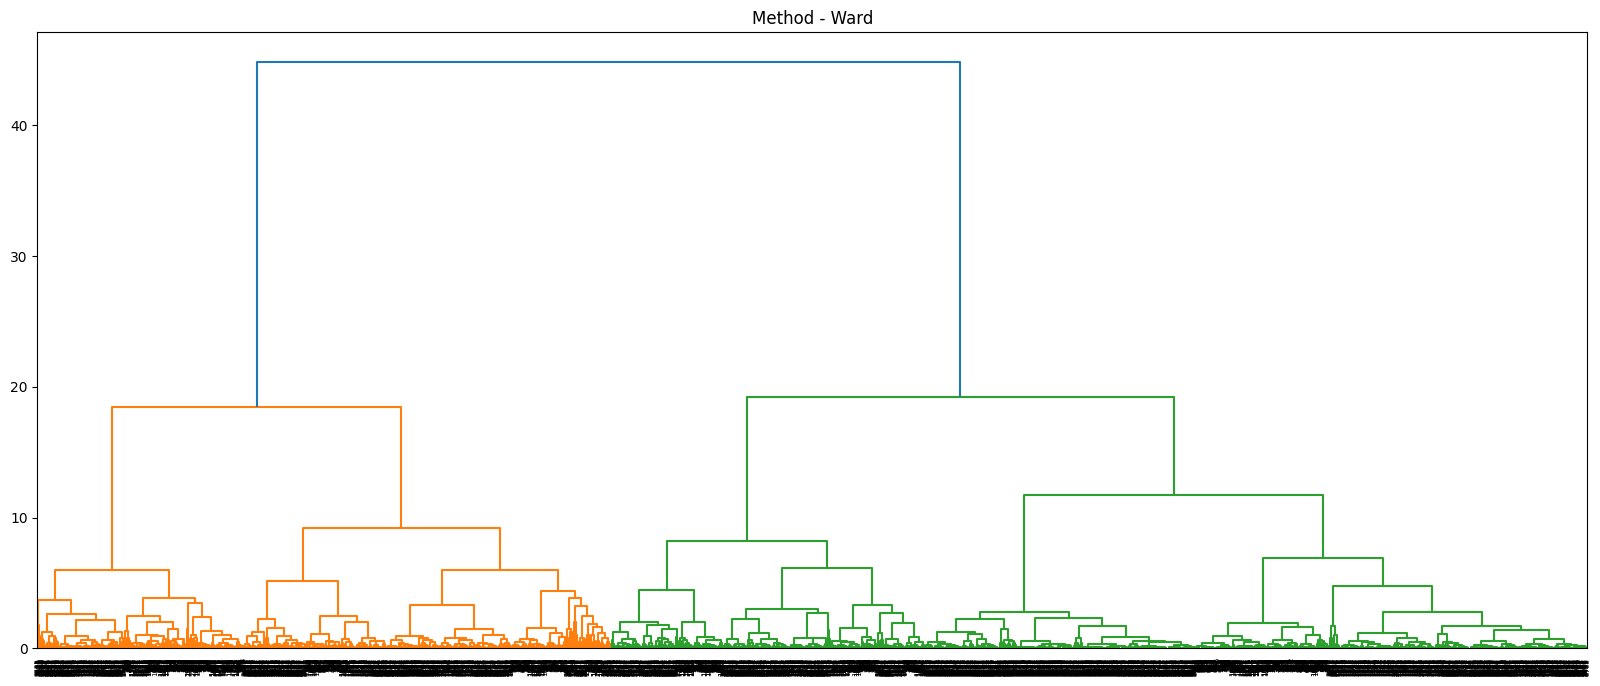

In [153]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(MM_X, method='ward'))
plt.title("Method - Ward")
plt.show()

In [154]:
#creating clusters method - average
HCW = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'ward')
Y_HCW = HCW.fit_predict(MM_X)
Clusters_c = pd.DataFrame(Y_HCW, columns=['Cluster'])
Clusters_c.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
1          1710
0          1481
2           808
dtype: int64

In [155]:
silhouette_HCS = silhouette_score(MM_X, Y_HCS)
silhouette_HCA = silhouette_score(MM_X, Y_HCA)
silhouette_HCC = silhouette_score(MM_X, Y_HCC)
silhouette_HCW = silhouette_score(MM_X, Y_HCW)
print(silhouette_HCS)
print(silhouette_HCA)
print(silhouette_HCC)
print(silhouette_HCW)


0.5351606918177734
0.39619766243707655
0.4172318835123988
0.43550164891825044


Till now, the Hierarchal clustering with Complete and Ward methods are better

# K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

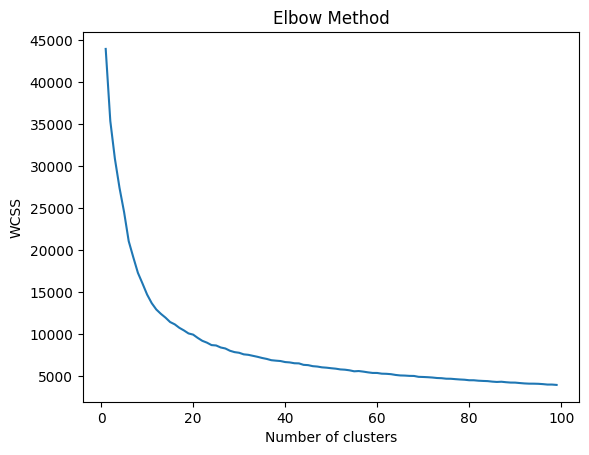

In [156]:
wcss = []
for i in range(1,100):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(SS_X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 100), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [157]:
kmeans = KMeans(n_clusters=3, random_state=32)
kmeans.fit(SS_X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [158]:
silhouette_K = silhouette_score(SS_X,labels)
print(silhouette_K)

0.3121716765282414


In [159]:
df['K_clusterid'] = kmeans.labels_
df.groupby('K_clusterid').agg(['mean']).reset_index()

,K_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1601.309221,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623,0.000000
1,1,2235.212262,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501,0.000000
2,2,1723.621951,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976,0.036585


# DBSCAN

In [160]:
dbscan = DBSCAN(eps = 1.25, min_samples=4)
dbscan.fit(SS_X)

DBSCAN(eps=1.25, min_samples=4)

In [161]:
#Noisy points are given by the label -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [162]:
DBS_labels = pd.DataFrame(dbscan.labels_, columns=['clusters_DBSCAN'])

In [163]:
df=pd.concat([df, DBS_labels], axis=1)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,K_clusterid,clusters_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1


In [164]:
df['clusters_DBSCAN'].value_counts()

 0    2388
 1    1193
-1     376
 2      15
 4       8
 3       6
 5       5
 6       4
 7       4
Name: clusters_DBSCAN, dtype: int64

In [165]:
#clusters by DBSCAN
df.groupby('clusters_DBSCAN').agg(['mean']).reset_index()

,clusters_DBSCAN,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,K_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1652.640957,204536.359043,1223.401596,2.760638,1.058511,1.130319,44215.518617,24.090426,2692.691489,7.867021,4814.297872,0.726064,0.015957,0.925532
1,0,2182.769263,55357.479899,22.107621,1.677554,1.000000,1.000000,9442.179648,8.645729,163.324958,0.479899,3800.498325,0.000000,0.000000,0.840452
2,1,1775.326907,69837.448449,23.538977,2.618609,1.000000,1.000000,24059.269070,13.476111,354.940486,1.117351,4561.077117,1.000000,0.000000,0.432523
3,2,2453.933333,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000,0.000000,1.000000
4,3,1791.500000,60493.333333,1875.166667,3.500000,1.000000,1.000000,36999.166667,16.000000,250.000000,0.666667,4503.666667,1.000000,0.000000,0.000000
5,4,2671.625000,36524.250000,0.000000,1.000000,3.000000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.000000,0.000000,1.000000
6,5,2924.200000,31161.600000,0.000000,1.000000,2.000000,1.000000,8723.400000,13.800000,350.000000,1.000000,3314.800000,1.000000,0.000000,1.000000
7,6,2474.500000,56856.250000,6047.250000,1.000000,1.000000,1.000000,3648.500000,4.000000,216.750000,0.750000,3726.500000,0.000000,0.000000,1.000000
8,7,3000.500000,74890.500000,0.000000,3.750000,1.000000,1.000000,36986.250000,31.000000,2107.500000,9.000000,2048.250000,1.000000,0.000000,0.500000


In [166]:
silhouette_D = silhouette_score(SS_X,DBS_labels)
print(silhouette_D)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.19449869100492093


Therefore, the best grouping is done by Hierarchial clustering by single with a score of 0.5352